In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import datetime


In [393]:
dataframe = pd.read_csv('Top-50-musicality-global.csv')

In [394]:
dataframe.describe()

,Unnamed: 0,Popularity,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
count,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000
mean,1794.000000,78.451101,0.688079,0.285637,193871.083031,0.646463,0.019187,5.348008,0.171895,-6.616918,0.503483,0.105122,121.027742,3.906659,0.528968
std,1036.199386,15.242710,0.135642,0.258611,47673.155605,0.163505,0.094564,3.494953,0.123540,2.658782,0.500058,0.097852,27.624052,0.433971,0.228932
min,0.000000,0.000000,0.244000,0.000008,61673.000000,0.024200,0.000000,0.000000,0.015400,-19.518000,0.000000,0.023200,60.038000,1.000000,0.037300
25%,897.000000,67.000000,0.596000,0.079600,162768.000000,0.543000,0.000000,2.000000,0.097400,-8.065000,0.000000,0.039900,99.904000,4.000000,0.359000
50%,1794.000000,83.000000,0.706000,0.188000,187027.000000,0.669000,0.000001,5.000000,0.120000,-6.238000,1.000000,0.063300,118.024000,4.000000,0.524000
75%,2691.000000,90.000000,0.795000,0.441000,219724.000000,0.762000,0.000089,8.000000,0.214000,-4.813000,1.000000,0.131000,139.945000,4.000000,0.720000
max,3588.000000,100.000000,0.974000,0.984000,641941.000000,0.992000,0.901000,11.000000,0.963000,1.155000,1.000000,0.731000,217.969000,5.000000,0.978000


In [395]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3589 non-null   int64  
 1   Country           3589 non-null   object 
 2   Track Name        3583 non-null   object 
 3   Artist Name       3583 non-null   object 
 4   Album Name        3583 non-null   object 
 5   Popularity        3589 non-null   int64  
 6   Date              3589 non-null   object 
 7   Markets           3583 non-null   object 
 8   Danceability      3589 non-null   float64
 9   Acousticness      3589 non-null   float64
 10  duration          3589 non-null   int64  
 11  Energy            3589 non-null   float64
 12  Instrumentalness  3589 non-null   float64
 13  Key               3589 non-null   int64  
 14  Liveness          3589 non-null   float64
 15  Loudness          3589 non-null   float64
 16  Mode              3589 non-null   int64  


In [396]:
# Drop Unnamed: 0 as it’s unnecessary.
# Handle potential missing values in Country, Track Name, Artist Name, Album Name, and Markets. (see above the number of non-null values)

dataframe = dataframe.drop(columns=["Unnamed: 0"])
# dataframe = dataframe.dropna() # kikapcsolom ezt mert lent van egy  jobb megoldás. Enkódoljuk a NaN értékeket számokká és úgy korreláltatjuk őket.


In [397]:
dataframe['Country'] = pd.Series(dataframe['Country'], dtype="string")
dataframe['Track Name'] = pd.Series(dataframe['Country'], dtype="string")
dataframe['Artist Name'] = pd.Series(dataframe['Country'], dtype="string")
dataframe['Album Name'] = pd.Series(dataframe['Country'], dtype="string")
dataframe['Markets'] = pd.Series(dataframe['Country'], dtype="string")

# Convert Date to datetime type.
dataframe['Date'] = pd.to_datetime(dataframe['Date'], errors='coerce')

dataframe['duration'] = pd.Series(dataframe['duration'].transform(lambda x: x / 1000))

# dataframe['duration'] = pd.Series(dataframe['duration'].transform(lambda x: datetime.timedelta(milliseconds=x)))

In [398]:
dataframe.dtypes

Country             string[python]
Track Name          string[python]
Artist Name         string[python]
Album Name          string[python]
Popularity                   int64
Date                datetime64[ns]
Markets             string[python]
Danceability               float64
Acousticness               float64
duration                   float64
Energy                     float64
Instrumentalness           float64
Key                          int64
Liveness                   float64
Loudness                   float64
Mode                         int64
Speechiness                float64
Tempo                      float64
TSignature                   int64
Positiveness               float64
dtype: object

In [399]:
dataframe.head

<bound method NDFrame.head of      Country Track Name Artist Name Album Name  Popularity       Date Markets  \
0     Global     Global      Global     Global          91 2023-11-03  Global   
1     Global     Global      Global     Global         100 2023-09-15  Global   
2     Global     Global      Global     Global          99 2022-09-23  Global   
3     Global     Global      Global     Global          82 2023-11-03  Global   
4     Global     Global      Global     Global          93 2023-10-26  Global   
...      ...        ...         ...        ...         ...        ...     ...   
3584     VNM        VNM         VNM        VNM          84 2023-11-03     VNM   
3585     VNM        VNM         VNM        VNM          63 2023-08-16     VNM   
3586     VNM        VNM         VNM        VNM          83 2023-10-06     VNM   
3587     VNM        VNM         VNM        VNM          84 2023-11-03     VNM   
3588     VNM        VNM         VNM        VNM          66 2022-07-11     VNM  

In [400]:
dataframe.sort_values(['Country', 'Artist Name', 'Album Name', 'Popularity'], ascending=False, inplace=True)
dataframe.head

<bound method NDFrame.head of      Country Track Name Artist Name Album Name  Popularity       Date Markets  \
3112     ZAF        ZAF         ZAF        ZAF         100 2023-09-15     ZAF   
3123     ZAF        ZAF         ZAF        ZAF          98 2023-09-01     ZAF   
3094     ZAF        ZAF         ZAF        ZAF          95 2023-07-28     ZAF   
3119     ZAF        ZAF         ZAF        ZAF          95 2023-06-16     ZAF   
3132     ZAF        ZAF         ZAF        ZAF          95 2023-07-13     ZAF   
...      ...        ...         ...        ...         ...        ...     ...   
816      ARE        ARE         ARE        ARE          82 2023-10-24     ARE   
847      ARE        ARE         ARE        ARE          82 2014-10-27     ARE   
815      ARE        ARE         ARE        ARE          81 2023-04-27     ARE   
826      ARE        ARE         ARE        ARE          76 2023-09-22     ARE   
839      ARE        ARE         ARE        ARE          71 2023-10-19     ARE  

In [401]:
dataframe.isnull().sum()

Country              0
Track Name           0
Artist Name          0
Album Name           0
Popularity           0
Date                21
Markets              0
Danceability         0
Acousticness         0
duration             0
Energy               0
Instrumentalness     0
Key                  0
Liveness             0
Loudness             0
Mode                 0
Speechiness          0
Tempo                0
TSignature           0
Positiveness         0
dtype: int64

In [402]:
dataframe.dropna(inplace = True)

In [403]:
dataframe['Danceability'].value_counts().describe()

count    540.000000
mean       6.607407
std        7.949139
min        1.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       57.000000
Name: count, dtype: float64

In [404]:
dataframe['Positiveness'].value_counts().describe()

count    748.000000
mean       4.770053
std        6.013199
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       47.000000
Name: count, dtype: float64

In [405]:
import seaborn as sns

In [406]:
dataframe['Popularity'].corr(dataframe['Danceability'])

-0.042328313980036614

In [407]:
dataframe['Popularity'].corr(dataframe['Positiveness'])

-0.035046830428521414

In [408]:
dataframe['Popularity'].corr(dataframe['Tempo'])

-0.012568648205124404

<AxesSubplot: >

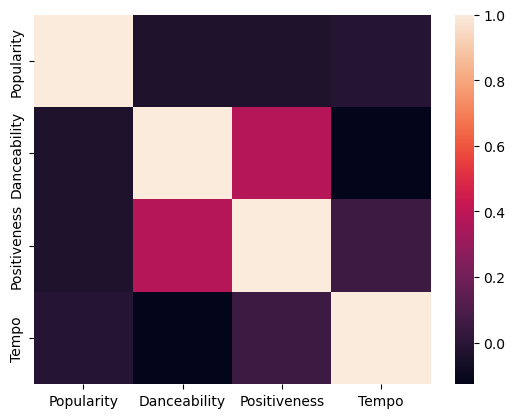

In [409]:
sns.heatmap(dataframe[['Popularity', 'Danceability', 'Positiveness', 'Tempo']].corr(method='pearson', min_periods=1))

# Analyze the Distribution of Popularity 

To get a sense of how popularity is distributed.

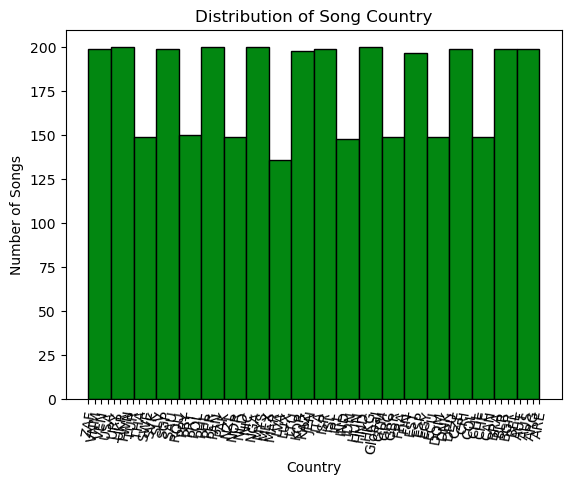

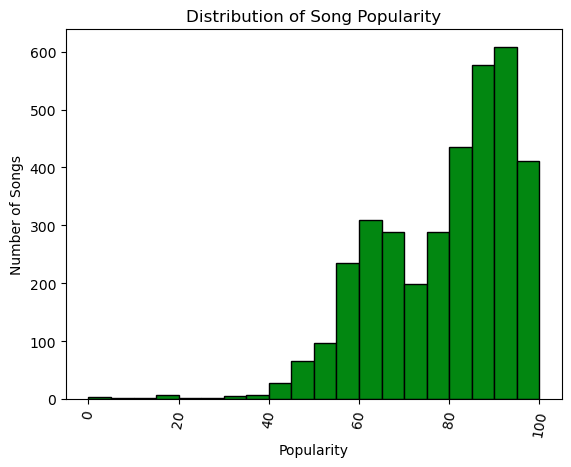

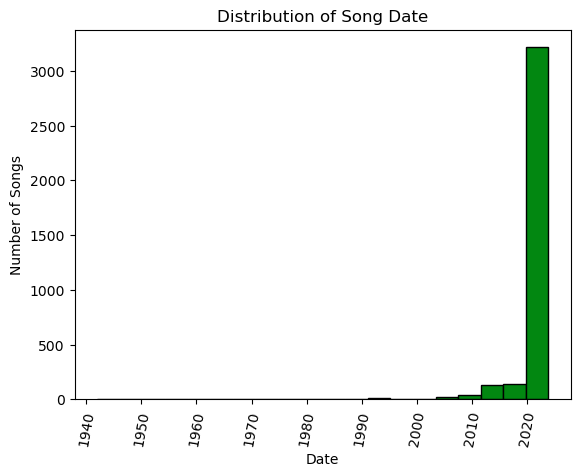

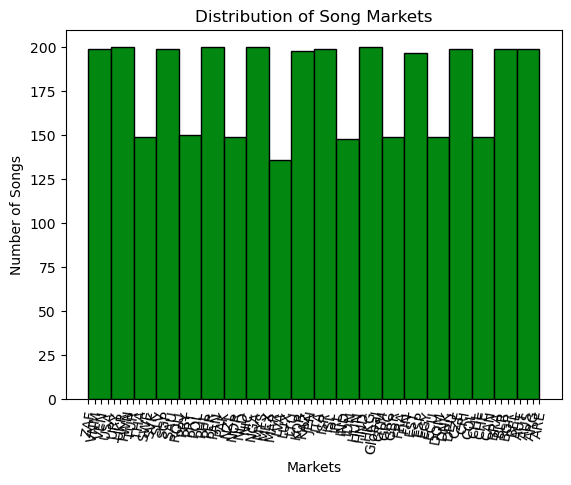

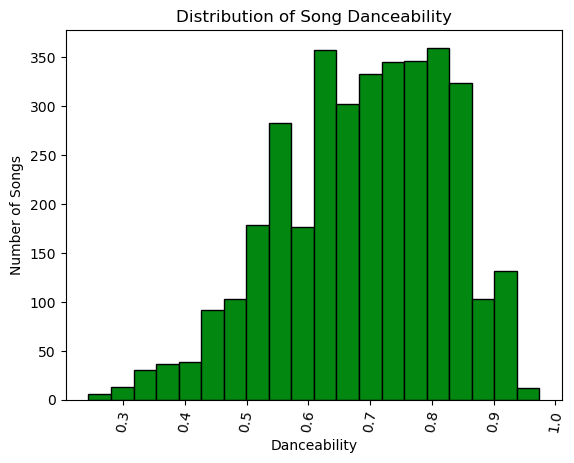

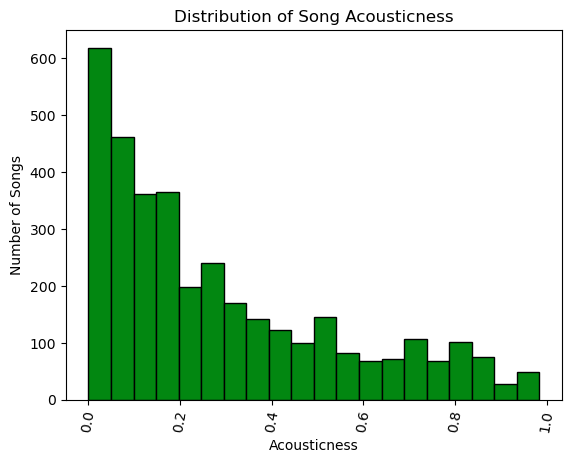

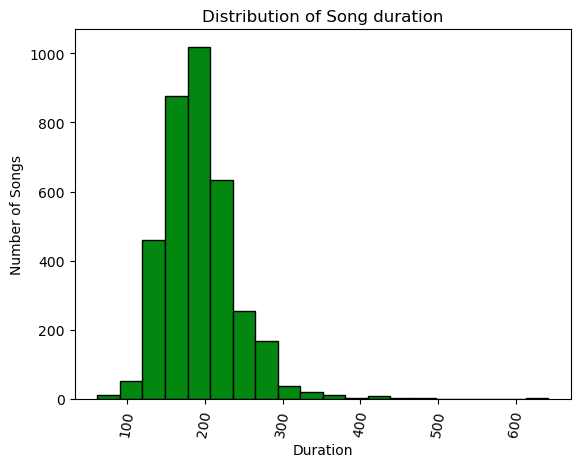

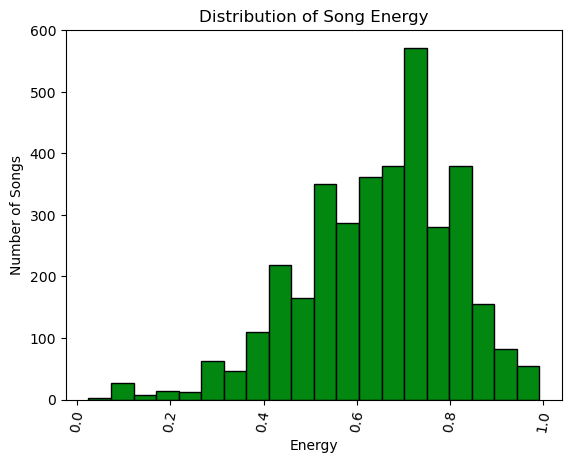

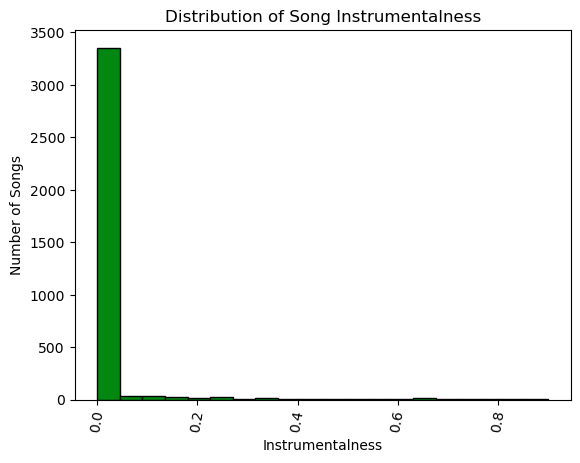

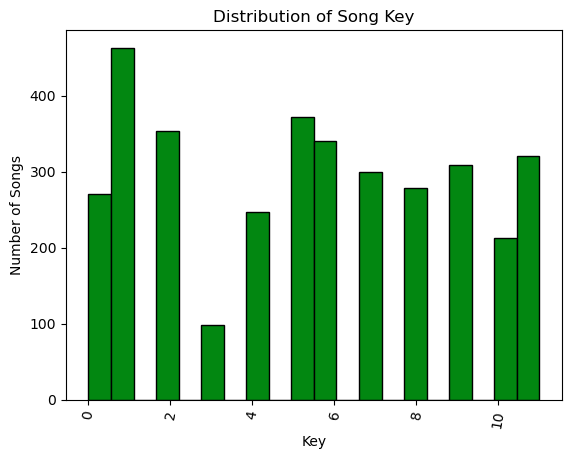

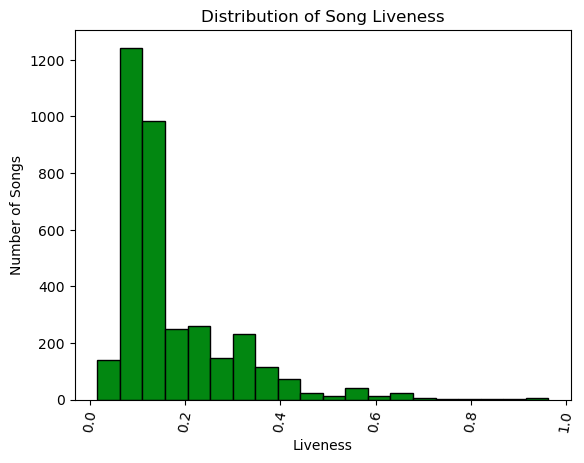

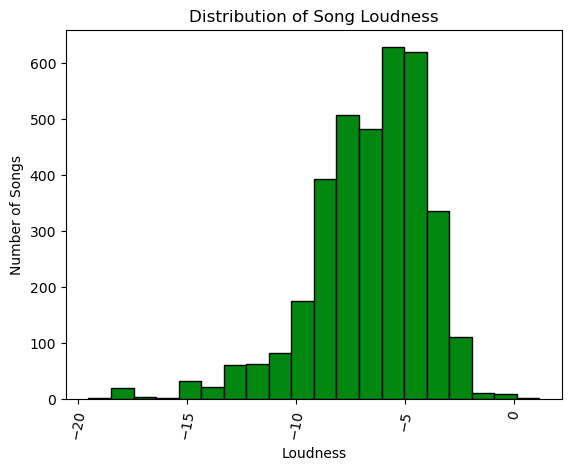

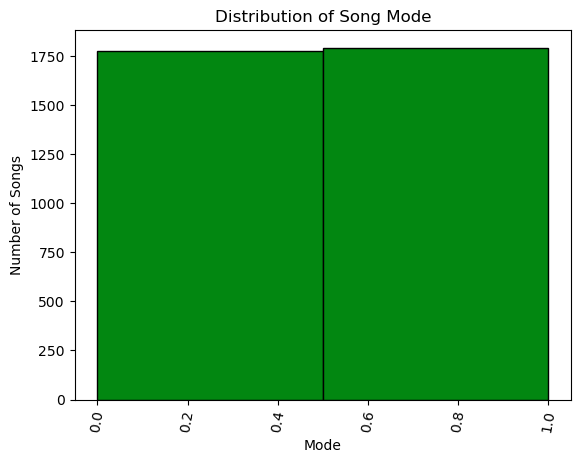

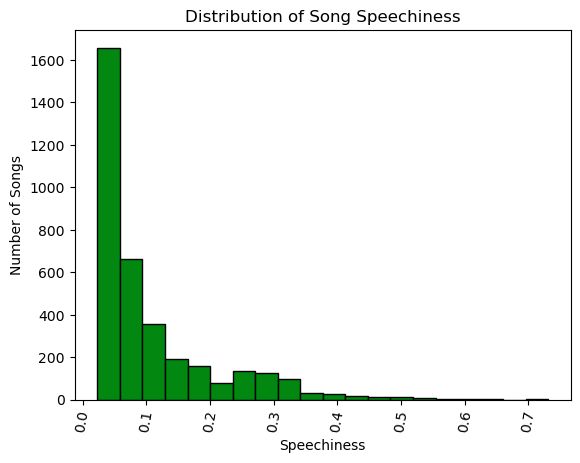

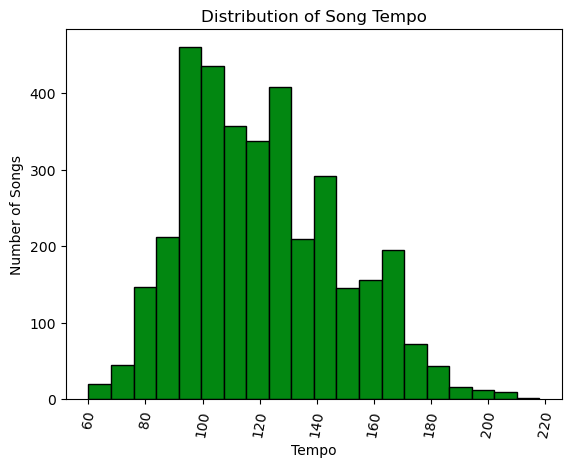

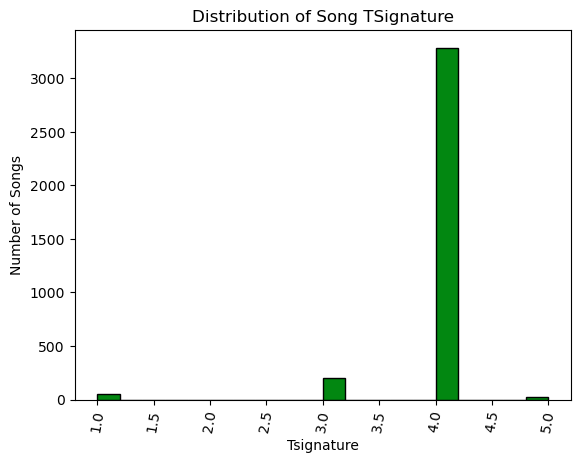

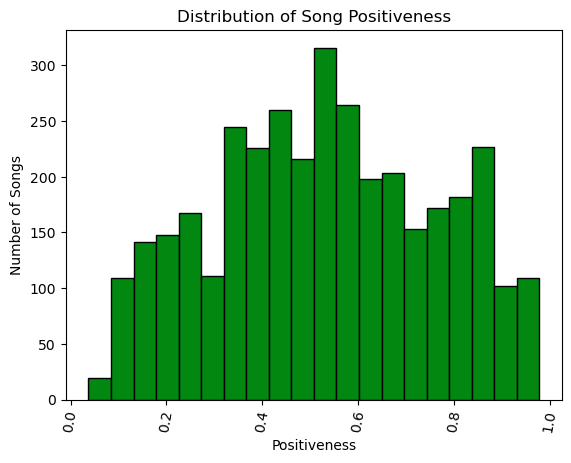

In [416]:

# Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness



attrbutes = ["Country","Popularity","Date","Markets","Danceability","Acousticness","duration","Energy","Instrumentalness","Key","Liveness","Loudness","Mode","Speechiness","Tempo","TSignature","Positiveness"]

for attr in attrbutes:
	key = attr
	
	if attr == "Mode":
		number_of_bins = 2
	else:
		number_of_bins = 20
	
	plt.hist(dataframe[key], bins=number_of_bins, color="#028711", edgecolor="black")
	plt.xlabel(f"{attr.capitalize()}")
	plt.ylabel("Number of Songs")
	plt.xticks(rotation=80, ha="center")
	plt.title(f"Distribution of Song {key}")
	plt.show()


In [ ]:

print("Before Encoding:", dataframe.columns)

# df_encoded = pd.get_dummies(dataframe, columns=["Country", "Markets", "Track Name", "Artist Name", "Album Name"], drop_first=True)
df_encoded = pd.get_dummies(dataframe, drop_first=True, dummy_na=True)
# Parameters: 
# columns
# 	list-like, default None
#	Column names in the DataFrame to be encoded. If columns is None then all the columns with object, string, or category dtype will be converted.


print("After Encoding:", df_encoded.columns)



Before Encoding: Index(['Country', 'Track Name', 'Artist Name', 'Album Name', 'Popularity',
       'Date', 'Markets', 'Danceability', 'Acousticness', 'duration', 'Energy',
       'Instrumentalness', 'Key', 'Liveness', 'Loudness', 'Mode',
       'Speechiness', 'Tempo', 'TSignature', 'Positiveness'],
      dtype='object')
After Encoding: Index(['Popularity', 'Date', 'Danceability', 'Acousticness', 'duration',
       'Energy', 'Instrumentalness', 'Key', 'Liveness', 'Loudness',
       ...
       'Markets_THA', 'Markets_TUR', 'Markets_TWN', 'Markets_UKR',
       'Markets_URY', 'Markets_USA', 'Markets_VEN', 'Markets_VNM',
       'Markets_ZAF', 'Markets_<NA>'],
      dtype='object', length=375)


In [ ]:
print(df_encoded.head())

      Popularity       Date  Danceability  Acousticness  duration  Energy  \
3112         100 2023-09-15         0.750        0.2560    131872  0.7330   
3123          98 2023-09-01         0.628        0.7010    172965  0.5230   
3094          95 2023-07-28         0.673        0.0856    200256  0.7220   
3119          95 2023-06-16         0.847        0.1190    125040  0.6220   
3132          95 2023-07-13         0.444        0.9590    222370  0.0911   

      Instrumentalness  Key  Liveness  Loudness  ...  Markets_THA  \
3112          0.000000    6     0.114    -3.180  ...        False   
3123          0.002740   11     0.219    -8.307  ...        False   
3094          0.000000    3     0.137    -3.495  ...        False   
3119          0.000000    1     0.285    -6.747  ...        False   
3132          0.000001    0     0.098   -17.665  ...        False   

      Markets_TUR  Markets_TWN  Markets_UKR  Markets_URY  Markets_USA  \
3112        False        False        False      

In [ ]:
# Now calculate the correlation matrix
correlation_matrix = df_encoded.corr()

print(correlation_matrix)

              Popularity      Date  Danceability  Acousticness  duration  \
Popularity      1.000000 -0.007712     -0.042328      0.007305  0.011975   
Date           -0.007712  1.000000      0.197892     -0.042365 -0.137467   
Danceability   -0.042328  0.197892      1.000000     -0.305066 -0.222531   
Acousticness    0.007305 -0.042365     -0.305066      1.000000  0.013324   
duration        0.011975 -0.137467     -0.222531      0.013324  1.000000   
...                  ...       ...           ...           ...       ...   
Markets_USA     0.094533 -0.056761     -0.043748     -0.011308  0.015993   
Markets_VEN     0.072333  0.025660      0.078721     -0.000988  0.005571   
Markets_VNM    -0.053122  0.029835      0.011600      0.088463  0.011238   
Markets_ZAF    -0.072937 -0.003750      0.027627     -0.056593  0.266741   
Markets_<NA>         NaN       NaN           NaN           NaN       NaN   

                Energy  Instrumentalness       Key  Liveness  Loudness  ...  \
Populari

In [ ]:
# Check for NaN or Infinite values
if correlation_matrix.isnull().values.any() or (correlation_matrix == float('inf')).values.any():
    print("Data contains NaN or Infinite values!")
    
print(correlation_matrix.where(lambda col: col.isnull()).count())
print(correlation_matrix.where(lambda col: col == float("inf")).count())
# print(correlation_matrix.values().where(lambda col: math.isinf(col).count()))



Data contains NaN or Infinite values!
Popularity      0
Date            0
Danceability    0
Acousticness    0
duration        0
               ..
Markets_USA     0
Markets_VEN     0
Markets_VNM     0
Markets_ZAF     0
Markets_<NA>    0
Length: 375, dtype: int64
Popularity      0
Date            0
Danceability    0
Acousticness    0
duration        0
               ..
Markets_USA     0
Markets_VEN     0
Markets_VNM     0
Markets_ZAF     0
Markets_<NA>    0
Length: 375, dtype: int64


In [ ]:
# from sklearn.preprocessing import StandardScaler

# Scale the correlation matrix to have mean 0 and variance 1
# scaler = StandardScaler()
# correlation_matrix_scaled = scaler.fit_transform(correlation_matrix)

# plt.figure(figsize=(12, 6))
# sns.heatmap(correlation_matrix_scaled, annot=False, cmap="coolwarm")
# plt.title("Scaled Feature Correlation Heatmap")
# plt.xticks(rotation=45, ha="right")
# plt.yticks(rotation=0, va="center")
# plt.show()


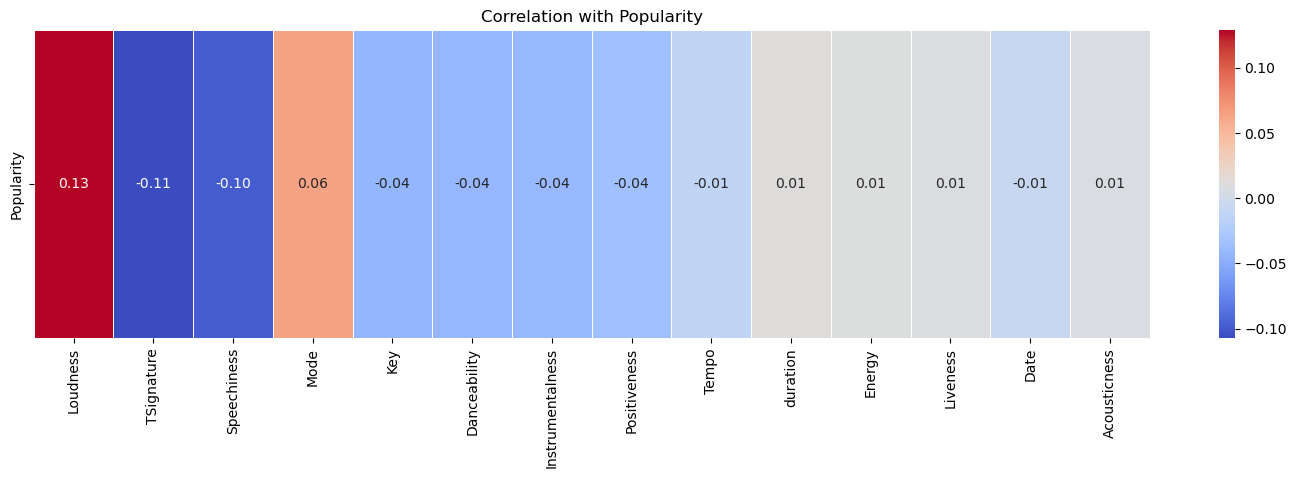

In [ ]:
# Select only numeric columns for correlation calculation
numeric_columns = dataframe.select_dtypes(include=["float64", "int64", "datetime"]).columns


# Compute the correlation matrix for the numeric columns
correlation_matrix = dataframe[numeric_columns].corr()


# Extract the correlation of 'Popularity' with all other columns
popularity_corr = correlation_matrix["Popularity"].drop("Popularity")


# Reshape the data to make it suitable for a heatmap
popularity_corr = popularity_corr.to_frame()  # Convert to a DataFrame for better plotting

# Sort correlations by absolute value
popularity_corr = popularity_corr.sort_values(by='Popularity', ascending=False, key=lambda col: col.abs())

# Plot the heatmap
plt.figure(figsize=(18, 4))
sns.heatmap(popularity_corr.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation with Popularity")
plt.show()


# Plot the correlation matrix
# plt.figure(figsize=(120, 60))
# sns.heatmap(popularity_corr.T, annot=False, cmap="coolwarm", vmin = -0.3, vmax=0.3)
# plt.title("Feature Correlation Heatmap")
# plt.xticks(rotation=45, ha="right")
# plt.yticks(rotation=0, va="center")
# plt.show()


In [ ]:
# Calculating the correlation of column A against all others
# corr_matrix = dataframe.corr()['A']


# f: https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
# To find the correlation among
# the columns using pearson method
# dataframe.corr(method='pearson')

